# Εργασία 1. Επιβλεπόμενη Μάθηση - UCI dataset
Neural Networks - Team 22\
\
Alexandros Tsafos el18211\
Christina Kostaki el18136\
Sofia Vouzika el18843
  

Στο πρώτο μέρος της 1ης εργασίας, ασχολούμαστε με dataset από το UCI Machine Learning Repository, διαμορφώνουμε κατάλληλα τα δεδομένα ώστε να μας είναι εύχρηστα, εφαρμόζουμε διάφορους ταξινομητές και αξιολογούμε βάσει μετριτικών την απόδοσή τους. Αρχικά τους αξιολογούμε με τις default τιμές τους, ενώ στη συνέχεια πραγματοποιούμε βελτιστοποιήσεις και κρίνουμε εκ νέου τη συμπεριφορά τους. Τέλος, σχολιάζουμε τα παραπάνω αποτελέσματα.


Αρχικά κάνουμε upgrade στις βιβλοθήκες που θα χρειαστούμε.

In [145]:
!pip install --upgrade pip
!pip install scikit-learn --upgrade 
!pip install numpy --upgrade 
!pip install --upgrade matplotlib 
!pip install --upgrade pandas
import pandas as pd
import numpy as np

UnboundLocalError: local variable 'child' referenced before assignment

![UCI ML Logo](http://archive.ics.uci.edu/ml/assets/logo.gif "UCI Machine Learning Repository")

To [UCI ML Repository](http://archive.ics.uci.edu/ml/index.php) είναι το διασημότερο αποθετήριο datasets για Machine Learning. Το dataset με το οποίο θα δουλέψουμε είναι το [Dermatology Database](http://archive.ics.uci.edu/ml/datasets/Dermatology). Το dataset περιλαμβάνει διάφορες πληροφορίες σχετικά με δερματολογικές παθήσεις, συγκεκριμένα ESD (Erythemato-Squamous Diseases) καθώς και ετικέτες για κάθε δείγμα (sample), αν αυτό αντιστοιχεί σε μία από τις έξι κατηγορίες ESD. Το σύνολο δεδομένων έχει 365 δείγματα και περιλαμβάνει 34 χαρακτηριστικά (attributes) για κάθε δείγμα - όλα διατεταγμένα -, είτε κλινικά  π.χ. βαθμός εξανθήματος, φαγούρα, οικογενειακό ιστορικό είτε ιστοπαθολογικά όπως άκράτεια μελανίνης, εξωκυττάρωση, παρουσία ηωσινόφιλων. Θα χρησιμοποιήσουμε αυτό το dataset και τα χαρακτηριστικά για να προβλέψουμε σε ποια κατηγορία δερματολογικής πάθησης υπάγεται κάθε δείγμα.


Πήραμε τα δεδομένα από το Data Set Description και προσθέσαμε ως header τις ονομασίες των features για καλύτερη δόμηση του csv αρχείου και κλήση των δεδομένων. Τις  μη καταχωρημένες τιμές (συγκεκριμένα, στο feature 'Age'), τις αντικαταστήσαμε με τον μέσο όρο των υπολοίπων τιμών, με τις συναρτήσεις conv - όπου μετατρέπουμε όλες τις απουσιάζουσες τιμές σε -1 - και get_average - όπου, από τις υπόλοιπες τιμές υπολογίζουμε και αντικαθιστούμε τον μέσο όρο ηλικίας. Συνολικά, το ποσοστό των απουσιάζουσων τιμών αποτελούσε περίπου το 2.2% του συνολικού.


In [147]:
# Convert the missing values to -1, so we have floats
def conv(val, default = -1):
    try:
        return int(val)
    except:
        return default

def get_average(values):
    # Remove the values that are not numbers
    existent_values = [int(i) for i in values if i != -1]

    return int(np.average(existent_values))

def load_dermatology(preproccessing):
    # TO DO: read csv and extract data (pandas)
    # Prepare a dictionary to hold the key value pairs
    target_names = ['psoriasis','seboreic dermatitis','lichen planus','pityriasis rosea','cronic dermatitis','pityriasis rubra pilaris']
    output = {'DESCR':"Dermatology Database by UCI", 'target_names': target_names}

    # Read CSV and replace the uknown Age values with the average Age.
    dataset = pd.read_csv("dermatology.data", converters={'Age': conv})
    
    if preproccessing is True:
        dataset = dataset.replace(-1, get_average(dataset["Age"].values))
    
    # Extract the values
    target = dataset["Label"].values
    data = dataset.iloc[:,:34].values
    feature_names = dataset.columns[:-1]

    # Add them to the dictionary
    output['data'] = data
    output['target'] = target
    output['feature_names'] = feature_names

    return output

# Load dataset
data = load_dermatology(False)
data



{'DESCR': 'Dermatology Database by UCI',
 'target_names': ['psoriasis',
  'seboreic dermatitis',
  'lichen planus',
  'pityriasis rosea',
  'cronic dermatitis',
  'pityriasis rubra pilaris'],
 'data': array([[ 2,  2,  0, ...,  1,  0, 55],
        [ 3,  3,  3, ...,  1,  0,  8],
        [ 2,  1,  2, ...,  2,  3, 26],
        ...,
        [ 3,  2,  2, ...,  2,  3, 28],
        [ 2,  1,  3, ...,  2,  3, 50],
        [ 3,  2,  2, ...,  3,  0, 35]]),
 'target': array([2, 1, 3, 1, 3, 2, 5, 3, 4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 5, 6, 2,
        5, 3, 5, 1, 6, 5, 2, 3, 1, 2, 1, 1, 4, 2, 3, 2, 3, 1, 2, 4, 1, 2,
        5, 3, 4, 6, 2, 3, 3, 4, 1, 1, 5, 1, 2, 3, 4, 2, 6, 1, 5, 1, 2, 3,
        1, 4, 5, 1, 2, 6, 3, 5, 4, 2, 2, 1, 3, 5, 1, 2, 2, 2, 5, 1, 1, 3,
        1, 4, 2, 2, 5, 1, 3, 4, 2, 5, 1, 6, 2, 5, 1, 2, 2, 1, 4, 1, 3, 1,
        1, 3, 5, 3, 3, 5, 2, 3, 4, 1, 2, 5, 6, 1, 1, 2, 6, 3, 5, 4, 1, 1,
        3, 5, 5, 1, 4, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 5, 4, 2, 2, 1, 1, 1,
        5, 3, 2, 3, 2, 

Τα σημαντικά κλειδιά του λεξικού που διμηιουργήσαμε παραπάνω είναι οι ονομασίες των κατηγοριών εξόδου (target_names), οι κατηγορίες (ή κλάσεις ή ετικέτες) εξόδου (target), τα ονόματα των χαρακτηριστικών (feature_names) και τέλος τα ίδια τα χαρακτηριστικά (data). Στην πράξη χρειαζόμαστε μόνο τα χαρακτηριστικά (features) και τις ετικέτες τους (labels). Οι ονομασίες μας πληροφορούν για τη φυσική ερμηνεία των χαρακτηριστικών.

Δημιουργούμε νέες μεταβλητές για κάθε σημαντικό σύνολο πληροφορίας του dataset:

In [148]:
# Organize our data
label_names = data["target_names"]
labels = data["target"] 
feature_names = data["feature_names"]
features = data["data"]

Στη συνέχεια τυπώνουμε τις έξι κλάσεις - ετικέτες:

In [149]:
# Our target names - possible diseases
print(label_names)

['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'cronic dermatitis', 'pityriasis rubra pilaris']


In [150]:
# Classes of all dermatology labels where 1:psoriasis incremented to 6:pityriasis rubra pilaris
print(labels)
# Labels are an one dimensional array
print(labels.shape)

unique, counts = np.unique(labels, return_counts=True)
print("frequencies:", counts)

[2 1 3 1 3 2 5 3 4 4 1 2 2 1 3 4 2 1 3 5 6 2 5 3 5 1 6 5 2 3 1 2 1 1 4 2 3
 2 3 1 2 4 1 2 5 3 4 6 2 3 3 4 1 1 5 1 2 3 4 2 6 1 5 1 2 3 1 4 5 1 2 6 3 5
 4 2 2 1 3 5 1 2 2 2 5 1 1 3 1 4 2 2 5 1 3 4 2 5 1 6 2 5 1 2 2 1 4 1 3 1 1
 3 5 3 3 5 2 3 4 1 2 5 6 1 1 2 6 3 5 4 1 1 3 5 5 1 4 2 3 1 2 1 1 3 3 3 2 5
 4 2 2 1 1 1 5 3 2 3 2 2 4 2 3 6 2 1 1 3 4 3 3 1 1 1 3 1 1 2 3 3 1 1 1 1 6
 2 2 2 2 1 3 3 3 1 1 2 3 2 2 2 5 5 5 5 5 1 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 4
 5 5 5 5 5 5 5 2 2 2 2 1 1 1 1 1 1 6 6 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 4 4 4
 4 4 4 5 5 5 5 6 6 6 4 4 4 1 1 1 1 1 2 2 4 4 4 1 1 2 2 2 3 3 3 3 1 1 1 1 5
 5 5 5 5 3 3 3 4 1 1 4 4 4 1 1 1 3 3 3 3 3 1 1 1 1 4 4 1 1 4 3 3 4 1 1 4 4
 5 5 1 1 5 5 3 1 5 5 6 6 4 4 6 6 6 1 1 1 5 5 1 1 1 1 2 2 4 4 3 3 1]
(366,)
frequencies: [112  61  72  49  52  20]


Τυπώνουμε τη συχνότητα εμφάνισης των έξι κλάσεων και παρατηρούμε ότι πρόκειται για μη ισορροπημένο dataset, καθώς η πρώτη κλάση εμφανίζεται συχνότερα (>1.5 φορά) από κάθε άλλη. Συγκεκριμένα, 30.6%, 16.7%, 19.7%, 13.4%, 14.3%, και 5.5% είναι τα ποσοστά των έξι κλάσεων, αντιστοιχίζοντας τες με τη σειρά εμφάνισής τους παραπάνω.

In [151]:
# Names of the features
print(feature_names)

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age'],
      dtype='object')


In [152]:
#dictionary's dimensions
print(features.shape)


(366, 34)


Έχοντας ολοκληρώσει τη δημιουργία του dictionary μας, θα προχωρήσουμε στο να δημιουργήσουμε απλούς ταξινομητές για να προβλέπουμε σε ποιά από τις έξι κατηγορίες ανήκουν τα δείγματά μας.

Για την αξιολόγηση των ταξινομητών χρειάζονται δεδομένα που δεν έχουν δει προηγουμένωνς, γιαυτό και αρχικά, πριν φτιαχτεί το μοντέλο κάθε ταξινομητή, χωρίζουμε τα δεδομένα μας τυχαία σε ένα σύνολο εκπαίδευσης (train set) και ένα σύνολο ελέγχου (test set), με αναλογία 70-30 μέσω της train_test_split.

Χρησιμοποιούμε το train set για να εκπαιδεύουμε και να βελτιώνουμε το μοντέλο του ταξινομητή κατά την ανάπτυξή του και το test set για να αξιολογούμε στατιστικά την απόδοση του. 

In [153]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

Στη συνέχεια θα ορίσουμε τους διάφορους ταξινομητές μας, εισάγωντας τις αντίστοιχες βιβλιοθήκες του sklearn. Πιο συγκεκριμένα:
* Dummy Classifier με τις εξής διαφοροποιήσεις: 
    * “uniform”: προβλέπει τυχαία και ομοιόμορφα.
    * “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
    * “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
    * “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.
* Gaussian Naive Bayes Classifier. Παραμετρικός ταξινομητής. Βασίζεται στο νόμο του Bayes, θεωρώντας όλα τα χαρακτηριστικά ανεξάρτητα μεταξύ τους. Λόγω των συνεχών μεταβλητών που έχουμε, υποθέτουμε ότι η κατανομή $P(x_i \mid y)$. κάθε χαρακτηριστικού ακολουθεί την κανονική κατανομή:
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$ 
Με τα δεδομένα του training set, για κάθε κλάση υπολογίζουμε τη μέση τιμή $\mu_y$ και τη διακύμανση $\sigma^2_y$ κάθε χαρακτηριστικού, συνεπώς όσο πιο κοντά στη μέση τιμή του (ως προς το σύνολο του train set) είναι ένα χαρακτηριστικό ενός δείγματος, τόσο πιο κοντά στη μοναδα θα είναι η πιθανοφάνια του χαρκτηριστικού και αντιθετοαντίστροφα.
* kNN. Μη παραμετρικός ταξινομητής. Κάθε νέο δείγμα ταξινομείται στην κλάση στην οποία ανήκει η πλειοψηφία των k - κοντινότερων γειτόνων του βάσει της ευκλείδιας μεταξύ τους απόστασης. Φαίνεται να μην έχει φάση εκπαίδευσης, ωστόσο για κάθε ταξινόμηση ενός δείγματος, πρέπει να συγκριθεί η απόστασή του με κάθε δείγμα του train set, άρα απαιτούνται όλα τα δείγματα του set. Η επιλγοή του k γίνεται από εμάς και επηρεάζει τόσο τη διακύμανση όσο και την απόκλιση. Όσο μικρότερο το k, τόσο πιο περίπλοκη η συνολική εικόνα λόγω επιλογής της κλάσης βάσει ενός μόνο κοντινού γείτονα, ενώ όσο αυξάνεται, τόσο πιο ομοιόμορφο το σύνολο μεταξύ των κλάσεων, αλλά με περισσότερα αποκλίνοντα δείγματα.\
*Για πληρέστερη εικόνα και αξιολόγηση, δημιουργήσαμε τρεις ταξινομητές kNN με τιμές k (5,15,25)*
* Logistic Regression. Βασίζεται στην αρχή της γραμμικής παλινδρόμησης, συγκεκριμένα στην πολλαπλή γραμμική παλινδρόμηση, δηλαδή την εύρεση ενός διανύσματος του χώρου που αποτελεί την διαχωριστική ευθεία για την βέλτιστη ομαδοποίηση των δειγμάτων. Η LR στηρίζεται στη μετρατροπή του προβλήματος της παλινδρόμησης σε ένα πρόβλημα δυαδικής ταξινόμησης, χρησιμοποιώντας τη σιγμοειδή συνάρτηση, ορίζοντας ένα κατώφλι και υπολογίζοντας τις συναρτήσεις πυκνότητας πιθανότητας και κόστους.


In [154]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

gnb = GaussianNB()
logisticRegr = LogisticRegression(solver='saga', max_iter=100)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_25 = KNeighborsClassifier(n_neighbors=25)
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_6 = DummyClassifier(strategy="constant", constant=6)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")


Αφού ορίσαμε τους ταξινομητές μας - με τις αντίστοιχες παραμέτρους, σε όσους χρειαζόταν - προχωράμε στην αξιολόγηση αυτών βάσει δύο μετρικών: της ορθότητας και της F1 score.
\
\
Ορθότητα (accuracy): Ορίζεται ως το σύνολο ορθών προβλέψεων / σύνολο προβλέψεων (ή δειγμάτων στο test set). Αποτελεί την απλούστερη μετρική απόδοσης ενός ταξινομητή.
\
\
F1 score: Αρμονικός μέσος της ακρίβειας και της ανάκλησης
$$F1 = 2\frac{P \times R}{P+R}$$
Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off.

Στο παρακάτω κομμάτι κώδικα, βλέπουμε αρχικά τη συμπεριφορά των ταξινομητών χωρίς καμία βελτιστοποίηση (out-of-the-box metrics). Με τη μέθοδο fit εκπαιδεύουμε τον ταξινομητή και με τη μέθοδο predict παράγουμε προβλέψεις βάσει των δεδομένων του test set. Καλούμε επίσης τις συναρτήσεις των μετρικών και τις επιστρέφουμε κατά φθίνουσα σειρά, για μια πρώτη κατάταξη των ταξινομητών.

In [155]:
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

wisconsin_accuracy = {}
wisconsin_f1 = {}

def out_of_the_box_metrics(classifier, classifier_name):
  classifier.fit(train, train_labels)
  preds = classifier.predict(test)
  wisconsin_accuracy[classifier_name] = accuracy_score(test_labels, preds)
  wisconsin_f1[classifier_name] = f1_score(test_labels, preds, average='macro')
  
out_of_the_box_metrics(dc_uniform, 'Uniform (random)')
out_of_the_box_metrics(dc_constant_1, 'Constant 1')
out_of_the_box_metrics(dc_constant_6, 'Constant 6')
out_of_the_box_metrics(dc_most_frequent, 'Most Frequent')
out_of_the_box_metrics(dc_stratified, 'Stratified')
out_of_the_box_metrics(gnb, 'Naive Bayes')
out_of_the_box_metrics(knn_5, 'KNN 5')
out_of_the_box_metrics(knn_15, 'KNN 15')
out_of_the_box_metrics(knn_25, 'KNN 25')
out_of_the_box_metrics(logisticRegr, 'Logistic Regression')



print("Classification Accuracy on the Wisconsin Dermatology Dataset:")
sorted_accuracy = [(k, wisconsin_accuracy[k]) for k in sorted(wisconsin_accuracy, key=wisconsin_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k + ': ' + str(v))

print("\nClassification F1 macro score on the Wisconsin Dermatology Dataset:")
sorted_f1 = [(k, wisconsin_f1[k]) for k in sorted(wisconsin_f1, key=wisconsin_f1.get, reverse=True)]
for k, v in sorted_f1:
  print(k + ': ' + str(v))

Classification Accuracy on the Wisconsin Dermatology Dataset:
Logistic Regression: 0.9818181818181818
Naive Bayes: 0.8636363636363636
KNN 5: 0.8272727272727273
KNN 15: 0.7
KNN 25: 0.6181818181818182
Constant 1: 0.33636363636363636
Most Frequent: 0.33636363636363636
Stratified: 0.17272727272727273
Uniform (random): 0.11818181818181818
Constant 6: 0.03636363636363636

Classification F1 macro score on the Wisconsin Dermatology Dataset:
Logistic Regression: 0.9703947368421053
Naive Bayes: 0.8191832858499525
KNN 5: 0.7654200308640234
KNN 15: 0.6148140871512282
KNN 25: 0.5198903396484041
Stratified: 0.11274131274131273
Uniform (random): 0.09416744330537434
Constant 1: 0.08390022675736962
Most Frequent: 0.08390022675736962
Constant 6: 0.011695906432748537


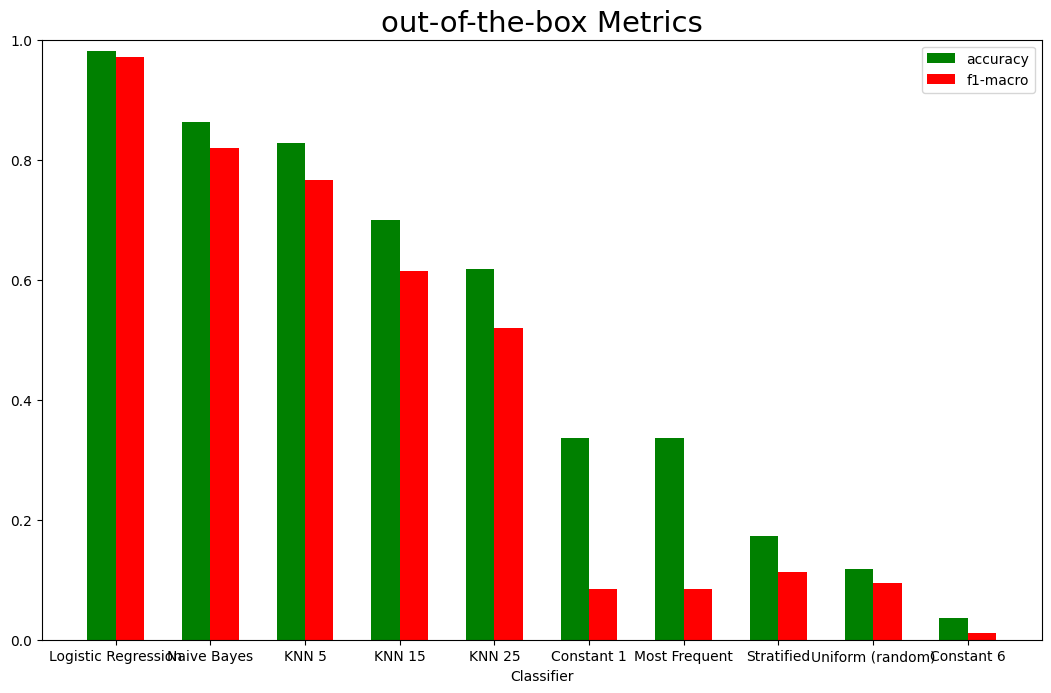

In [156]:
import matplotlib.pyplot as plt

merged_dict = [(k,wisconsin_accuracy[k],wisconsin_f1[k]) for k in sorted(wisconsin_accuracy, key=wisconsin_accuracy.get, reverse=True)]
keys, accuracy, f1_macro = zip(*merged_dict)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(keys)) - 0.15, accuracy, color = 'g', width = 0.3)
ax.bar(np.arange(len(keys)) + 0.15, f1_macro, color = 'r', width = 0.3)
plt.xlabel('Classifier')
ax.legend(labels=['accuracy', 'f1-macro'])
ax.set_title('out-of-the-box Metrics',fontsize = 21)
plt.xticks(np.arange(len(keys)), keys)

plt.ylim(0, 1)

plt.show()


# PREPROCESSING

In [157]:
data = load_dermatology(preproccessing=True)

# Organize our data
label_names = data["target_names"]
labels = data["target"] 
feature_names = data["feature_names"]
features = data["data"]

In [158]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

In [159]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

gnb = GaussianNB()
logisticRegr = LogisticRegression(solver='saga', max_iter=100)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_25 = KNeighborsClassifier(n_neighbors=25)
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_6 = DummyClassifier(strategy="constant", constant=6)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")


In [160]:
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

wisconsin_accuracy = {}
wisconsin_f1 = {}

def metrics(classifier, classifier_name):
  classifier.fit(train, train_labels)
  preds = classifier.predict(test)
  wisconsin_accuracy[classifier_name] = accuracy_score(test_labels, preds)
  wisconsin_f1[classifier_name] = f1_score(test_labels, preds, average='macro')
  
metrics(dc_uniform, 'Uniform (random)')
metrics(dc_constant_1, 'Constant 1')
metrics(dc_constant_6, 'Constant 6')
metrics(dc_most_frequent, 'Most Frequent')
metrics(dc_stratified, 'Stratified')
metrics(gnb, 'Naive Bayes')
metrics(knn_5, 'KNN 5')
metrics(knn_15, 'KNN 15')
metrics(knn_25, 'KNN 25')
metrics(logisticRegr, 'Logistic Regression')



print("Classification Accuracy on the Wisconsin Dermatology Dataset:")
sorted_accuracy = [(k, wisconsin_accuracy[k]) for k in sorted(wisconsin_accuracy, key=wisconsin_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k + ': ' + str(v))

print("\nClassification F1 macro score on the Wisconsin Dermatology Dataset:")
sorted_f1 = [(k, wisconsin_f1[k]) for k in sorted(wisconsin_f1, key=wisconsin_f1.get, reverse=True)]
for k, v in sorted_f1:
  print(k + ': ' + str(v))

Classification Accuracy on the Wisconsin Dermatology Dataset:
Logistic Regression: 0.9818181818181818
Naive Bayes: 0.8727272727272727
KNN 5: 0.8363636363636363
KNN 15: 0.7636363636363637
KNN 25: 0.7545454545454545
Constant 1: 0.32727272727272727
Most Frequent: 0.32727272727272727
Stratified: 0.2545454545454545
Uniform (random): 0.18181818181818182
Constant 6: 0.03636363636363636

Classification F1 macro score on the Wisconsin Dermatology Dataset:
Logistic Regression: 0.979779411764706
Naive Bayes: 0.8402213041482448
KNN 5: 0.794328829099956
KNN 15: 0.6965589969752782
KNN 25: 0.6937959825417832
Stratified: 0.1702661317023019
Uniform (random): 0.16187405668592322
Constant 1: 0.08219178082191782
Most Frequent: 0.08219178082191782
Constant 6: 0.011695906432748537


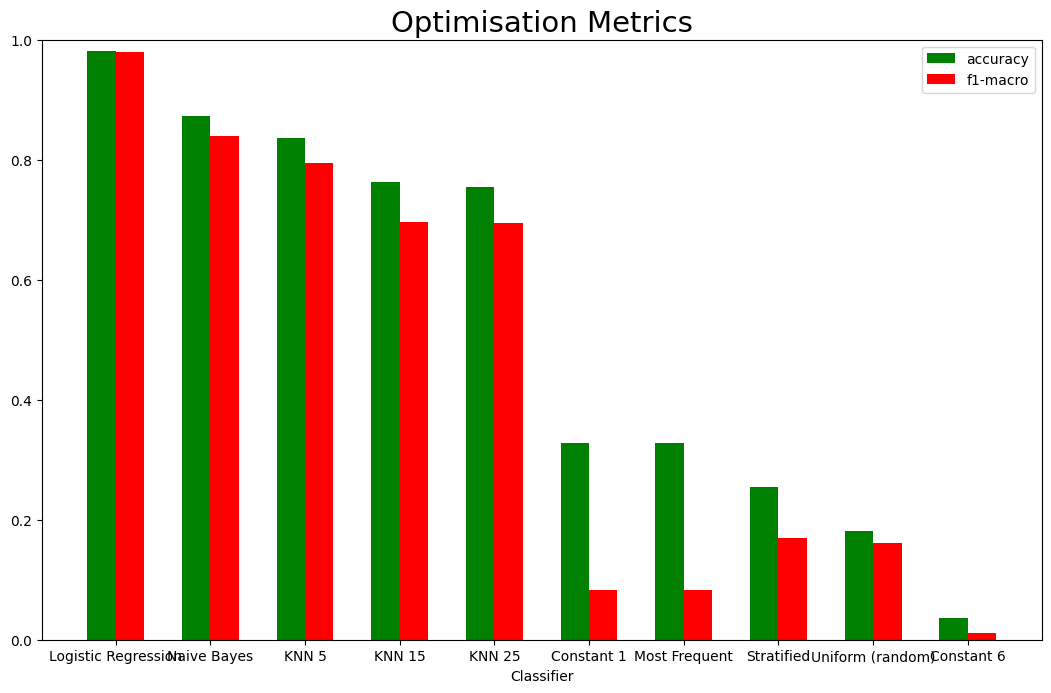

In [161]:
import matplotlib.pyplot as plt

merged_dict = [(k,wisconsin_accuracy[k],wisconsin_f1[k]) for k in sorted(wisconsin_accuracy, key=wisconsin_accuracy.get, reverse=True)]
keys, accuracy, f1_macro = zip(*merged_dict)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(keys)) - 0.15, accuracy, color = 'g', width = 0.3)
ax.bar(np.arange(len(keys)) + 0.15, f1_macro, color = 'r', width = 0.3)
plt.xlabel('Classifier')
ax.legend(labels=['accuracy', 'f1-macro'])
ax.set_title('Optimisation Metrics',fontsize = 21)
plt.xticks(np.arange(len(keys)), keys)

plt.ylim(0, 1)

plt.show()
